# Applied Machine Learning Project 1
# Exploring labeled data using KNN

## Import necessary packages

In [1]:
import seaborn as sb
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

## Import Penguins dataset from seaborn library

In [2]:
penguins = sb.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins.keys()

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

## Data Wrangling

In [4]:
#Check for missing values in data
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### Handling missing data
### Missing values are negligible in count for this dataset and there will not be loss of useful information if those are removed.

In [5]:
penguins = penguins.dropna(axis=0)

### Total 333 data points and 7 features are present in the dataset

In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### Check for duplicate rows to prevent Data Leakage problem

In [7]:
duplicateRow = penguins[penguins.duplicated()]
print(duplicateRow)

Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


## Statistical Summary of each class with respect to each attribute

In [8]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
penguins.drop(columns=['island','sex']).groupby('species').apply(lambda group:group.describe())

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
species                                                                       
Adelie    count      146.000000     146.000000         146.000000   146.000000
          mean        38.823973      18.347260         190.102740  3706.164384
          std          2.662597       1.219338           6.521825   458.620135
          min         32.100000      15.500000         172.000000  2850.000000
          25%         36.725000      17.500000         186.000000  3362.500000
          50%         38.850000      18.400000         190.000000  3700.000000
          75%         40.775000      19.000000         195.000000  4000.000000
          max         46.000000      21.500000         210.000000  4775.000000
Chinstrap count       68.000000      68.000000          68.000000    68.000000
          mean        48.833824      18.420588         195.823529  3733.088235
          std          3.339256       1.135395           7.131894   384.335081
          min         40.900000      16.400000         178.000000  2700.000000
          25%         46.350000      17.500000         191.000000  3487.500000
          50%         49.550000      18.450000         196.000000  3700.000000
          75%         51.075000      19.400000         201.000000  3950.000000
          max         58.000000      20.800000         212.000000  4800.000000
Gentoo    count      119.000000     119.000000         119.000000   119.000000
          mean        47.568067      14.996639         217.235294  5092.436975
          std          3.106116       0.985998           6.585431   501.476154
          min         40.900000      13.100000         203.000000  3950.000000
          25%         45.350000      14.200000         212.000000  4700.000000
          50%         47.400000      15.000000         216.000000  5050.000000
          75%         49.600000      15.750000         221.500000  5500.000000
          max         59.600000      17.300000         231.000000  6300.000000

In [10]:
penguins.drop(columns=['island','sex']).groupby('species').apply(lambda group:group.median())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.85,18.40,190.0,3700.0
Chinstrap,49.55,18.45,196.0,3700.0
Gentoo,47.40,15.00,216.0,5050.0


In [11]:
penguins.drop(columns=['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g']).groupby('species').apply(lambda group:group.describe())

species  island     sex
species                                    
Adelie    count         146     146     146
          unique          1       3       2
          top        Adelie   Dream  Female
          freq          146      55      73
Chinstrap count          68      68      68
          unique          1       1       2
          top     Chinstrap   Dream    Male
          freq           68      68      34
Gentoo    count         119     119     119
          unique          1       1       2
          top        Gentoo  Biscoe    Male
          freq          119     119      61

In [12]:
penguins.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,Male


## Class Distribution

In [13]:
#penguins['sex'].replace(['Female', 'Male'],[0, 1], inplace=True)
#penguins['island'].replace(['Biscoe','Dream','Torgersen'],[1, 2, 3], inplace=True)
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

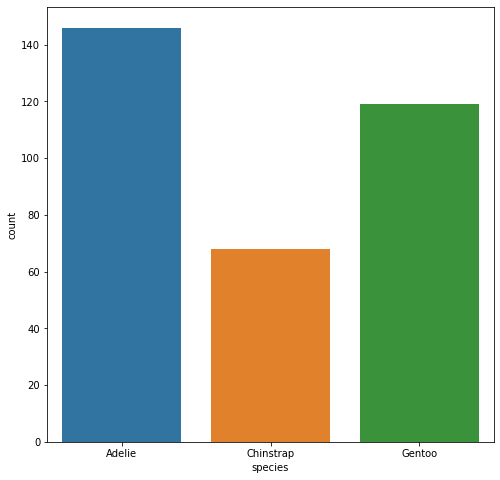

In [14]:
plt.figure(figsize = (8,8))
sb.countplot(x='species',data=penguins)

## Data Visualization

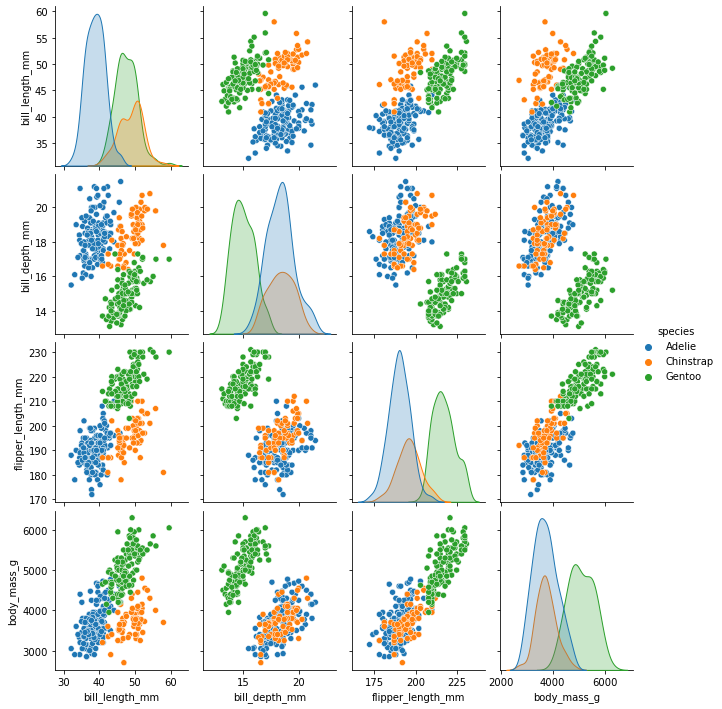

In [15]:
pairplot = sb.pairplot(penguins.drop(columns=['island','sex']), hue="species")
pairplot.fig.set_size_inches(10, 10)

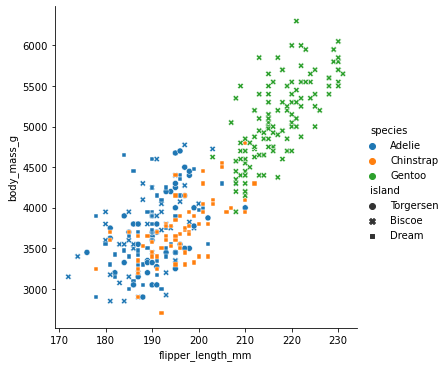

In [16]:
sb.relplot(x="flipper_length_mm", y="body_mass_g", hue="species", style="island", data=penguins);

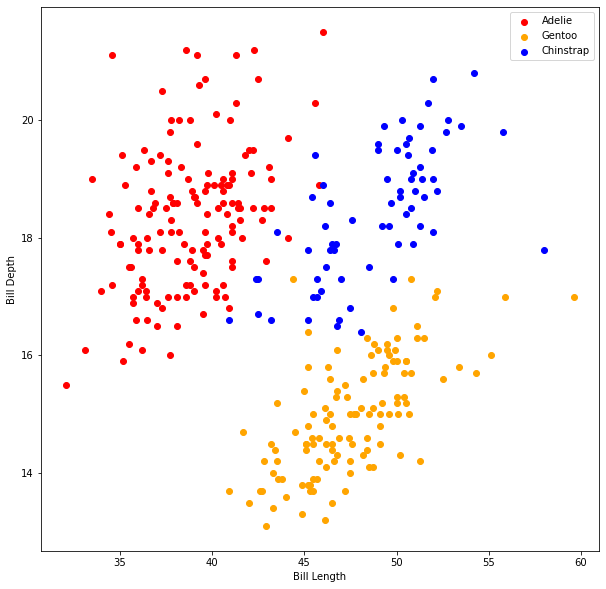

In [17]:
colors = ['red', 'orange', 'blue']
specs = ['Adelie','Gentoo','Chinstrap']
plt.figure(figsize=(10,10))
for i in range(3):
    x = penguins[penguins['species'] == specs[i]]
    plt.scatter(x['bill_length_mm'], x['bill_depth_mm'], c = colors[i], label=specs[i])
plt.xlabel("Bill Length")
plt.ylabel("Bill Depth")
plt.legend()

### Correlation Matrix

Text(0.5, 1.0, 'Correlation between features.')

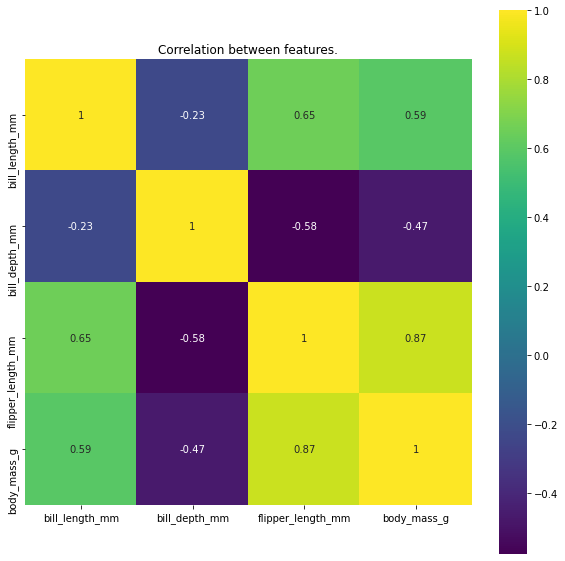

In [18]:
correlation = penguins.corr()
plt.figure(figsize = (10,10))
sb.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = 'viridis')
plt.title("Correlation between features.")

### From the above correlation matrix, we can observe that there is no significant relationship between features except flipper_length_mm and body_mass_g. This relation can be observed from the seaborn relational plot between flipper_length_mm and body_mass_g.

## Application of K-nearest Neighbors Algorithm

### Splitting data into training and testing datasets

In [19]:
X = penguins.drop(columns=['species','island','sex'])
y = penguins['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

### Dataset Partition

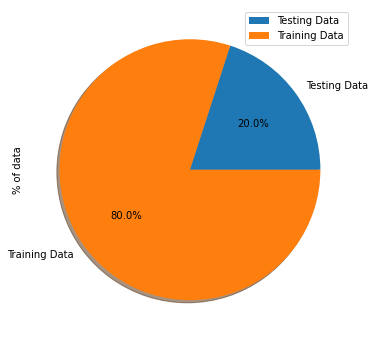

In [20]:
test_size=0.20
pie_frame = pd.DataFrame({'% of data': [test_size, 1 - test_size]},
                  index=['Testing Data', 'Training Data'])
pie_graph = pie_frame.plot.pie(y='% of data',
                               figsize=(6, 6),
                               autopct='%1.1f%%',
                               shadow=True,
                               startangle=0).get_figure()

### Feature Scaling - improves the performance of KNN
### Numerical features should have the same scale. If you pay attention, the Body Mass Index column is at a very different scale than all other body measurements. Generally, all features should be scaled so that they range from 0 to 1.

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Testing for best combination in KNN
### Implemented kd_tree and ball_tree algortihms with multiple k values and metrics

In [31]:
#KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
n_neighbors = [5,7,9,11,13,15,17,19,20]
weights = ['uniform', 'distance']
algorithms = ['auto', 'brute', 'ball_tree', 'kd_tree']
leaf_sizes = [10,20,30,40]   
p_values = [1, 2] 
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
bestKNN = []
bestScore = 0
for number in n_neighbors:
    for weight in weights:
        for algorithm in algorithms:
            for size in leaf_sizes:
                for p_value in p_values:
                    for metric in metrics:
                        currentKNN = KNeighborsClassifier(n_neighbors=number, weights = weight, algorithm=algorithm, leaf_size=size, p=p_value, metric=metric)
                        currentKNN.fit(X_train, y_train)
                        currentScore = currentKNN.score(X_test, y_test)
                        if currentScore > bestScore:
                            bestScore = currentScore
                            bestKNN.clear()
                            bestKNN.append(currentKNN)
                            #print(bestScore)
                            print("Best KNN Parameters are : k =",number,"metric =",metric, "Weights =", weight, "Algorithm =", algorithm, "leaf_size =",size,"p_value =",p_value)
                    
print("Best Accuracy of the model is: ", bestScore*100)


Best KNN Parameters are : k = 5 metric = euclidean Weights = uniform Algorithm = auto leaf_size = 10 p_value = 1
Best KNN Parameters are : k = 5 metric = manhattan Weights = uniform Algorithm = auto leaf_size = 10 p_value = 1
Best Accuracy of the model is:  98.50746268656717


### Best Accuracy we got is 98.5% 

### Training the model

In [32]:
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance', algorithm='auto', leaf_size=10, p=1, metric='manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, metric='manhattan', p=1, weights='distance')

### Predicting Test Dataset

In [33]:
y_pred = knn.predict(X_test)

### Accuaracy of the model

In [34]:
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)

Accuracy:  98.50746268656717


### Classification Report and Confusion Matrix

[[36  0  0]
 [ 1 12  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        36
   Chinstrap       1.00      0.92      0.96        13
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



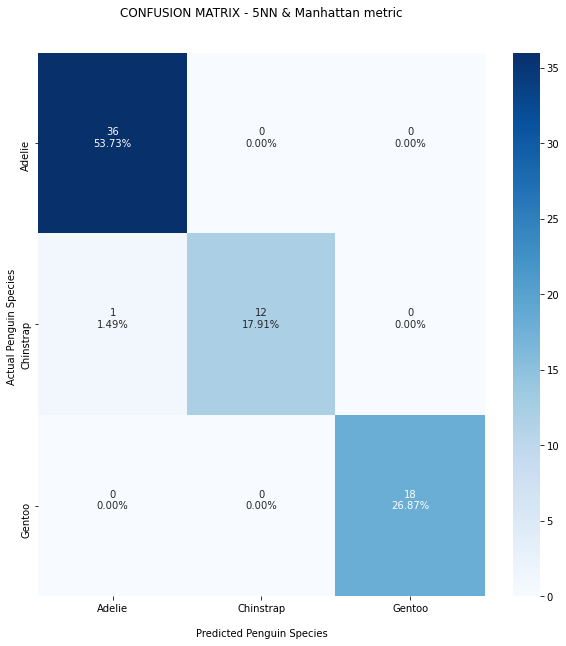

In [35]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,10))
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n" for v1, v2 in
zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
ax = sb.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('CONFUSION MATRIX - 5NN & Manhattan metric\n\n');
ax.set_xlabel('\nPredicted Penguin Species')
ax.set_ylabel('Actual Penguin Species ');
ax.xaxis.set_ticklabels(['Adelie','Chinstrap', 'Gentoo'])
ax.yaxis.set_ticklabels(['Adelie','Chinstrap', 'Gentoo'])
plt.show()

### Confusion Matrices for few distance metrics and k values

Confusion Matrix 5NN - Euclidean Metric - Ball_Tree
[[36  0  0]
 [ 2 11  0]
 [ 0  0 18]]
Accuracy:  97.01492537313433


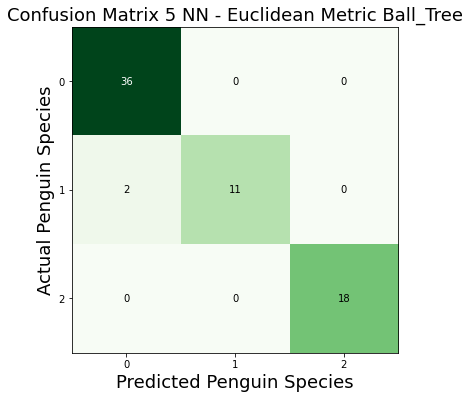

In [36]:
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance', algorithm='ball_tree', leaf_size=10, p=2, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Confusion Matrix 5NN - Euclidean Metric - Ball_Tree")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Penguin Species', fontsize=18)
plt.ylabel('Actual Penguin Species', fontsize=18)
plt.title('Confusion Matrix 5 NN - Euclidean Metric Ball_Tree', fontsize=18)
plt.show()

[[36  0  0]
 [ 2 11  0]
 [ 0  0 18]]
Accuracy:  97.01492537313433


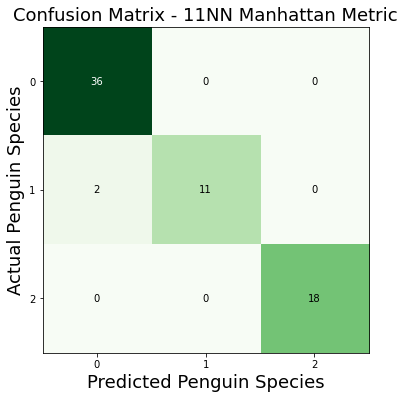

In [37]:
knn = KNeighborsClassifier(n_neighbors=11, weights = 'distance', algorithm='auto', leaf_size=20, p=1, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Penguin Species', fontsize=18)
plt.ylabel('Actual Penguin Species', fontsize=18)
plt.title('Confusion Matrix - 11NN Manhattan Metric', fontsize=18)
plt.show()

### Accuracy Vs n_neighbours (K value)

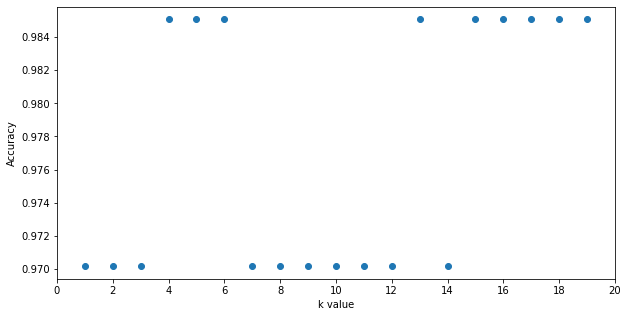

In [38]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', algorithm='auto', leaf_size=10, p=1, metric='manhattan')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize = (10,5))
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.show()

### Accuracy Vs Dataset Partition

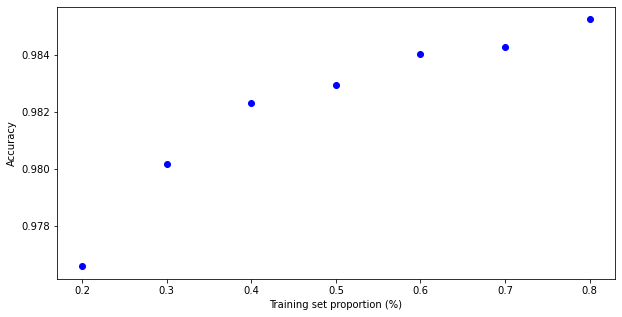

In [39]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors=5,weights='distance', metric='manhattan')
plt.figure(figsize = (10,5))
for s in t:
    scores = []
    for i in range(1, 1000):
        X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=1-s)
        X_train2 = scaler.fit_transform(X_train2)
        X_test2 = scaler.transform(X_test2)
        knn.fit(X_train2, y_train2)
        scores.append(knn.score(X_test2, y_test2))
    plt.plot(s, np.mean(scores), 'bo')
plt.xlabel('Training set proportion (%)')
plt.ylabel('Accuracy')
plt.show()

## Visualization of KNN

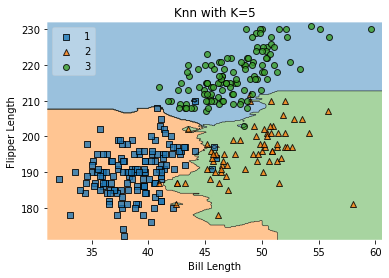

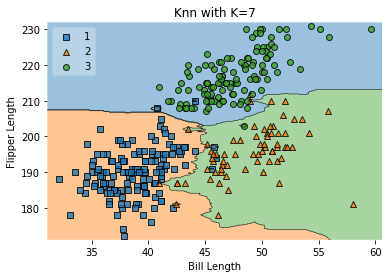

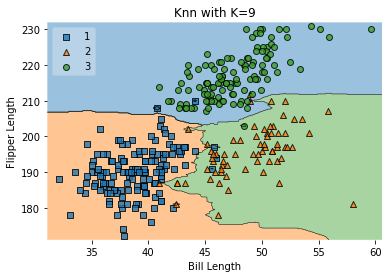

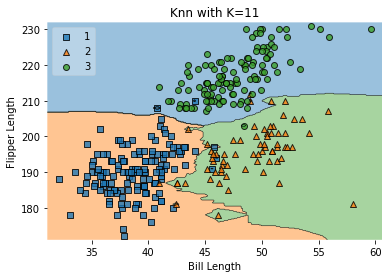

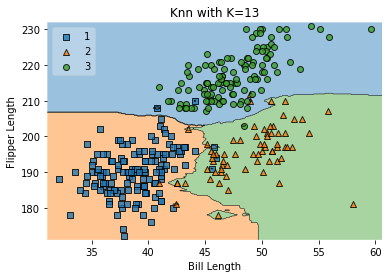

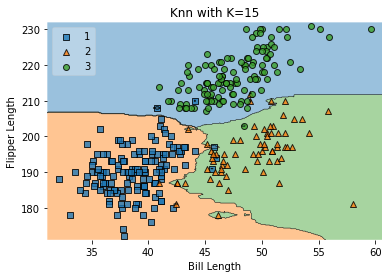

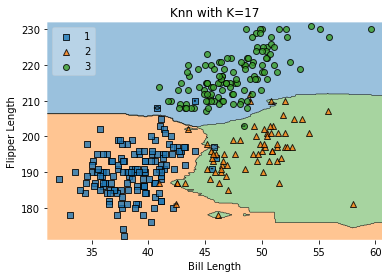

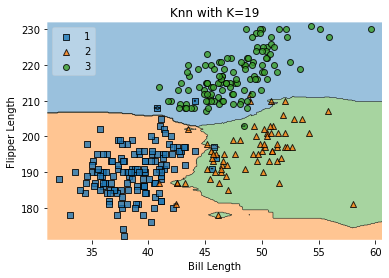

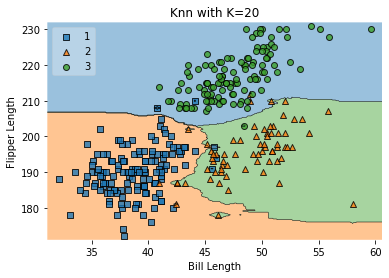

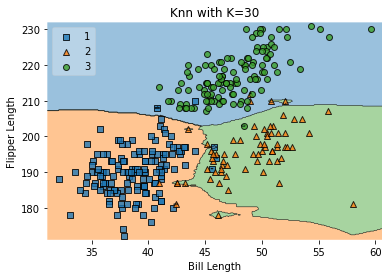

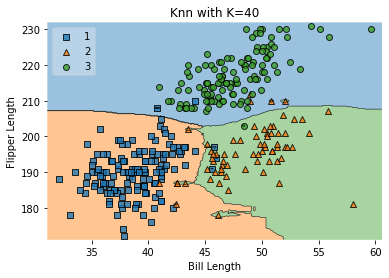

In [40]:
def knn_comparison(data, k):
    x = data[['bill_length_mm','flipper_length_mm']].values
    y = data['species'].astype(int).values
    clf = KNeighborsClassifier(n_neighbors=k,weights='distance', metric='manhattan')
    clf.fit(x, y)
    plot_decision_regions(x, y, clf=clf, legend=2)
    plt.xlabel('Bill Length')
    plt.ylabel('Flipper Length')
    plt.title("Knn with K=" + str(k))
    plt.show() 
     
dataset=penguins
dataset['species'].replace(['Adelie','Chinstrap','Gentoo'],[1, 2, 3], inplace=True)
for i in [5,7,9,11,13,15,17,19,20,30,40]:
    knn_comparison(dataset, i)